In [1]:
import pandas as pd
from collections import defaultdict
import math
import matplotlib.pyplot as plt

### Reading the files

In [2]:
tokens = []
file = open(r"hw4files/hw4_vocab.txt", "r")
for line in file:
    tokens.append(line.strip())
len(tokens)

500

In [3]:
counts = []
file = open(r"hw4files/hw4_unigram.txt", "r")
for line in file:
    counts.append(int(line.strip()))
len(counts)

500

In [4]:
unigrams = []
for i in range(500):
    unigrams.append([i+1,tokens[i],counts[i]])
len(unigrams)

500

In [5]:
bigrams = []
file = open(r"hw4files/hw4_bigram.txt", "r")
for line in file:
    i1,i2,cnt =  line.split()
    bigrams.append([int(i1),int(i2),tokens[int(i1)-1],tokens[int(i2)-1],int(cnt)])
len(bigrams)

144981

### Part a - Maximum Likelihood Estimate of the unigram distribution 

In [6]:
mleUnigram = defaultdict(float)
output = []
tot = sum(counts)
for i in range(500):
    mleUnigram[unigrams[i][1]]=unigrams[i][2]/tot#.append([unigrams[i][0],unigrams[i][1],unigrams[i][2]/tot])
    if unigrams[i][1].startswith('M'):
        output.append([unigrams[i][1],mleUnigram[unigrams[i][1]]])

In [7]:
pd.DataFrame(output,columns=["Index in token list","Probability of unigram"])

,Index in token list,Probability of unigram
0,MILLION,0.002073
1,MORE,0.001709
2,MR.,0.001442
3,MOST,0.000788
4,MARKET,0.000780
5,MAY,0.000730
6,M.,0.000703
7,MANY,0.000697
8,MADE,0.000560
9,MUCH,0.000515


### Part - b Maximum Likelihood Estimate of the bigram distribution 

In [8]:
precWordCount = defaultdict(int)

for i1,i2,_,_,cnt in bigrams:
    precWordCount[i1] += cnt
    
#precWordCount[1]

In [9]:
mleBigram = []

for i in range(len(bigrams)):
    mleBigram.append(bigrams[i])
    mleBigram[i][4]=bigrams[i][4]/precWordCount[bigrams[i][0]]

In [10]:
ans = [i[-3:] for i in mleBigram if i[2]=='THE']
ans.sort(key=lambda x: x[2],reverse = True)
pd.DataFrame(ans[0:10],columns = ["Preceeding word","Word","Bigram Probability"])

,Preceeding word,Word,Bigram Probability
0,THE,<UNK>,0.615020
1,THE,U.,0.013372
2,THE,FIRST,0.011720
3,THE,COMPANY,0.011659
4,THE,NEW,0.009451
5,THE,UNITED,0.008672
6,THE,GOVERNMENT,0.006803
7,THE,NINETEEN,0.006651
8,THE,SAME,0.006287
9,THE,TWO,0.006161


In [11]:
mleBigramDict = {}
for m in mleBigram:
    mleBigramDict[(m[2],m[3])] = m[4]

### Part c

In [12]:
sentence = "The stock market fell by one hundred points last week".upper()
sentence

'THE STOCK MARKET FELL BY ONE HUNDRED POINTS LAST WEEK'

In [13]:
ug = sentence.split()
print("Unigrams in the sentence are " + str(ug))

Unigrams in the sentence are ['THE', 'STOCK', 'MARKET', 'FELL', 'BY', 'ONE', 'HUNDRED', 'POINTS', 'LAST', 'WEEK']


In [14]:
bg = []
bg.append(("<s>",ug[0]))

for i in range(len(ug)-1):
    bg.append((ug[i],ug[i+1]))

print("Bigrams in the sentence are " + str(bg))

Bigrams in the sentence are [('<s>', 'THE'), ('THE', 'STOCK'), ('STOCK', 'MARKET'), ('MARKET', 'FELL'), ('FELL', 'BY'), ('BY', 'ONE'), ('ONE', 'HUNDRED'), ('HUNDRED', 'POINTS'), ('POINTS', 'LAST'), ('LAST', 'WEEK')]


In [15]:
pu = 1
for u in ug:
    if u in mleUnigram.keys():
        pu *= mleUnigram[u]
    else:
        pu*=0
if(pu==0):
    print("Log likelihood of the sentence under unigram model is -inf")
else:
    Lu = math.log(pu)
    print("Log likelihood of the sentence under unigram model is " + str(Lu))

Log likelihood of the sentence under unigram model is -64.50944034364878


In [16]:
pb = 1
for b in bg:
    if b in mleBigramDict.keys():
        pb *= mleBigramDict[b]
    else:
        pb *=0

if(pb==0):
    print("Log likelihood of the sentence under bigram model is -inf")
else:
    Lb = math.log(pb)
    print("Log likelihood of the sentence under bigram model is " + str(Lb))

Log likelihood of the sentence under bigram model is -40.91813213378977


### Part d

In [17]:
sentence = "The sixteen officials sold fire insurance".upper()
sentence

'THE SIXTEEN OFFICIALS SOLD FIRE INSURANCE'

In [18]:
ug = sentence.split()
print("Unigrams in the sentence are " + str(ug))

Unigrams in the sentence are ['THE', 'SIXTEEN', 'OFFICIALS', 'SOLD', 'FIRE', 'INSURANCE']


In [19]:
bg = []
bg.append(("<s>",ug[0]))

for i in range(len(ug)-1):
    bg.append((ug[i],ug[i+1]))
print("Bigrams in the sentence are " + str(bg))

Bigrams in the sentence are [('<s>', 'THE'), ('THE', 'SIXTEEN'), ('SIXTEEN', 'OFFICIALS'), ('OFFICIALS', 'SOLD'), ('SOLD', 'FIRE'), ('FIRE', 'INSURANCE')]


In [20]:
pu = 1
for u in ug:
    if u in mleUnigram.keys():
        pu *= mleUnigram[u]
    else:
        pu*=0

if(pu==0):
    print("Log likelihood of the sentence under unigram model is -inf")
else:
    Lu = math.log(pu)
    print("Log likelihood of the sentence under unigram model is " + str(Lu))

Log likelihood of the sentence under unigram model is -44.291934473132606


In [21]:
pb = 1

print("Bigrams not encountered in the training corpus:")
for b in bg:
    if b in mleBigramDict.keys():
        pb *= mleBigramDict[b]
    else:
        print(b)
        pb *=0
print("\n")
if(pb==0):
    print("Log likelihood of the sentence under bigram model is -inf")
else:
    Lb = math.log(pb)
    print("Log likelihood of the sentence under bigram model is " + str(Lb))

Bigrams not encountered in the training corpus:
('SIXTEEN', 'OFFICIALS')
('SOLD', 'FIRE')


Log likelihood of the sentence under bigram model is -inf


### Part e

The best value of lambda is 0.65 at which point the log likelihood is -42.96416428296298


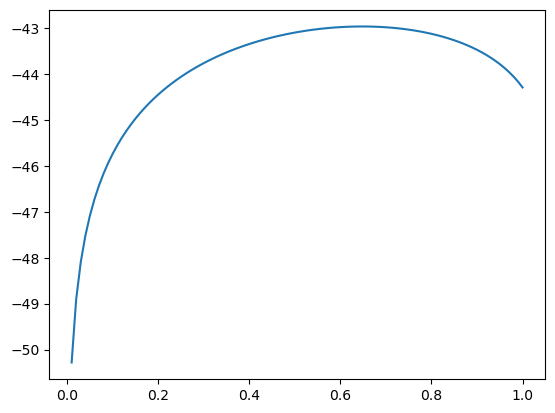

In [22]:
x = []
y = []
bestp = -1000
bestl = 0
for i in range(100):
    l = (i+1)*0.01
    mixedp = 1
    for b in bg:
        pm = 0
        if b[1] in mleUnigram.keys():
            pm += l*mleUnigram[b[1]]
        if b in mleBigramDict.keys():
            pm += (1-l)*mleBigramDict[b]
        mixedp *= pm
    Lm = math.log(mixedp)
    if(Lm>bestp):
        bestp = Lm
        bestl = l
    x.append(l)
    y.append(Lm)

print("The best value of lambda is "+str(bestl)+" at which point the log likelihood is "+str(bestp))
plt.plot(x,y)
plt.show()